# Project: Sifting Lahman’s Baseball Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In Venezuela, Baseball is a huge sport. My father is a huge fan and follows the MLB religiously. When I watch games on TV I'm always amazed at the number of statistics that are logged. So, naturally, when I saw that I could do this project with baseball data, I was ecstatic. There’s so much information it covers three centuries of sport. 

There are so many things that pique my interest when I think of baseball, and with Lahman’s database it’s possible I can answer them all. It has pitching, hitting, and fielding statistics for Major League Baseball from 1871 through 2016, plus a lot more of data that started being logged later. 

I narrowed down my interests down to three questions. The first one is how many games do pitchers play today comparted to what they used to play. I’ve seen pitchers being subbed often during games, and there’s such a volume of games that I highly doubt they can play in all of them. The second question is about money, how much is spent on player wages and how much do champions spend compared to the rest? Finally, the third question is about team performance, do winners tend to score a lot? Or do they defend better?

Using pandas and what I’ve learned so far in this nanodegree, I answer these three questions in this report.


In [1]:
# Import the necessary packages and set the theme for use with seaborn
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

### General Properties

The first thing do is choose the data where I'll find the answers. In this section I load the data and check how it's structured, look at the field names and see which values are available. I use four files of the naseball database: Pitching, Salaries, SeriesPost and Teams.

In [2]:
# First up, load the pitching data, then view the first few rows
pitching = pd.read_csv('core/Pitching.csv')
pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [3]:
# Now the last ones
pitching.tail()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
44958,zastrro01,2016,1,CHN,NL,1,0,8,1,0,...,0.0,0.0,1.0,0,66.0,1.0,3,0.0,2.0,1.0
44959,zieglbr01,2016,1,ARI,NL,2,3,36,0,0,...,5.0,0.0,2.0,0,165.0,30.0,13,1.0,1.0,10.0
44960,zieglbr01,2016,2,BOS,AL,2,4,33,0,0,...,2.0,1.0,1.0,0,124.0,12.0,8,1.0,0.0,6.0
44961,zimmejo02,2016,1,DET,AL,9,7,19,18,0,...,0.0,3.0,2.0,0,450.0,1.0,63,1.0,5.0,8.0
44962,zychto01,2016,1,SEA,AL,1,0,12,0,0,...,2.0,0.0,1.0,0,60.0,3.0,6,0.0,1.0,1.0


As you can see, older data doesn't have detailed stats. Nevertheless I only need game data for what I want to find out. 

Now, for the salary data:

In [4]:
salaries = pd.read_csv('core/Salaries.csv')
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


This data includes earnings by players, logged under playerID. One important thing is that it's only logged from 1985 onwards, there's no data of earlier seasons.

I want to look at how much do winners spend compared to the rest of the league, so I need to find out who the champions are. Next is the list of post-season winners

In [5]:
ws_winners = pd.read_csv('core/SeriesPost.csv')
ws_winners.head()

,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
0,1884,WS,PRO,NL,NY4,AA,3,0,0
1,1885,WS,CHN,NL,SL4,AA,3,3,1
2,1886,WS,SL4,AA,CHN,NL,4,2,0
3,1887,WS,DTN,NL,SL4,AA,10,5,0
4,1888,WS,NY1,NL,SL4,AA,6,4,0


Here I find the first issue that needs to be addressed. The team column is named teamIDwinner, but it's called teamID in the previous tables I loaded. Also, these records begin in 1884.

Finally, I load the Teams table, that has performace for teams instead of individual players.

In [6]:
teams  = pd.read_csv('core/Teams.csv')
teams.tail()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2830,2016,NL,SLN,STL,C,2,162,81.0,86,76,...,169.0,0.983,St. Louis Cardinals,Busch Stadium III,3444490.0,100,99,STL,SLN,SLN
2831,2016,AL,TBA,TBD,E,5,162,81.0,68,94,...,129.0,0.984,Tampa Bay Rays,Tropicana Field,1286163.0,93,94,TBR,TBA,TBA
2832,2016,AL,TEX,TEX,W,1,162,81.0,95,67,...,190.0,0.984,Texas Rangers,Rangers Ballpark in Arlington,2710402.0,106,105,TEX,TEX,TEX
2833,2016,AL,TOR,TOR,E,2,162,81.0,89,73,...,144.0,0.986,Toronto Blue Jays,Rogers Centre,3392099.0,111,110,TOR,TOR,TOR
2834,2016,NL,WAS,WSN,E,1,162,81.0,95,67,...,142.0,0.988,Washington Nationals,Nationals Park,2481938.0,100,98,WSN,MON,WAS


This one is pretty straightforward, it has season stats for each team and the column names are compatible with the majority of the tables I've loaded. 

### Data Trimming and Cleaning

Now it's time to extract the data I require from these tables. Regarding the pitching stats, since I want to look at game completion, I get the columns for Games, Games Started and Completed Games. Then I group them by year and get their sums.

In [7]:
pitching_year_totals = pitching.loc[:,('G','GS','CG')].groupby(pitching['yearID']).sum()

The reason I decided to get the sum is so I can create a new columm calculating the percentages of games what were completed by the starting pitcher, just by dividing the total of completed games over the started ones. The resulting table is as shown. This will help visualize the changes over the years.

In [8]:
pitching_year_totals['Percentage'] = pitching_year_totals['CG']/pitching_year_totals['GS']
pitching_year_totals.head()

,G,GS,CG,Percentage
yearID,,,,
1871,277,254,231,0.909449
1872,403,366,329,0.898907
1873,432,398,364,0.914573
1874,489,464,440,0.948276
1875,763,690,621,0.900000


Before continuing, let's check that the data is complete:

In [9]:
pitching_year_totals.isnull().sum() 

G             0
GS            0
CG            0
Percentage    0
dtype: int64

Ok, all entries have values.

Now, to get invidual pitching stats, specifically how much they played, I pull the IPOuts column, group data by year and then use the describe command. This way I get a new data frame with useful statistics such as the average number of innings pitched and the total number of pitchers who appeared in a season. I do the same for the Games statistics.

But, before I do those calculations, don't forget to check for missing values:

In [10]:
print(pitching.loc[:,('IPouts')].isnull().sum(), pitching.loc[:,('G')].isnull().sum())

0 0


All is fine, so I proceed:

In [11]:
pitching_IPO = pitching.loc[:,('IPouts')].groupby(pitching['yearID']).describe()
pitching_G = pitching.loc[:,('G')].groupby(pitching['yearID']).describe()

For the salary data, I'm not interested in indiduals. I group the data by Year and Team, then calculate sum. This results in a DataFrame with hierarchical index that can be accessed by yearID and teamID using .loc. The resulting table has two indexes, the first is the year, and the second is the teamID.

In [12]:
salaries_total_year_team = salaries['salary'].groupby([salaries['yearID'],salaries['teamID']]).sum()

In order to verify that this data is complete, first I check for null values 

In [13]:
salaries_total_year_team.isnull().sum() 

0

Ok, there are no empty values. Maybe they simply didn't list teams without data, so lets count them

In [14]:
salaries_total_year_team.count(level = 'yearID')

yearID
1985    26
1986    26
1987    26
1988    26
1989    26
1990    26
1991    26
1992    26
1993    28
1994    28
1995    28
1996    28
1997    28
1998    30
1999    30
2000    30
2001    30
2002    30
2003    30
2004    30
2005    30
2006    30
2007    30
2008    30
2009    30
2010    30
2011    30
2012    30
2013    30
2014    30
2015    30
2016    30
Name: salary, dtype: int64

Everything is fine, so now let's see what's inside the data:

In [15]:
salaries_total_year_team.loc[2000]

teamID
ANA    51464167
ARI    81027833
ATL    84537836
BAL    81447435
BOS    77940333
CHA    31133500
CHN    60539333
CIN    46867200
CLE    75880771
COL    61111190
DET    58265167
FLO    19872000
HOU    51289111
KCA    23433000
LAN    87924286
MIL    36505333
MIN    16519500
MON    32994333
NYA    92338260
NYN    79509776
OAK    31971333
PHI    47308000
PIT    28928334
SDN    54821000
SEA    58915000
SFN    53737826
SLN    61453863
TBA    62765129
TEX    70795921
TOR    44838332
Name: salary, dtype: int64

As an example, I took the year 2000 salaries per team. That gave me 30 teams plus their total wage bill. If we look for an specific teamID, however, we find that it might not have values for every year. This is due to changing franchise names. Lets compare what we have for the Cubs and the Angels, under 'CHN' and 'ANA', respectively.

In [16]:
salaries_total_year_team.loc[:,['CHN','ANA']]

yearID  teamID
1985    CHN        12702917
1986    CHN        17208165
1987    CHN        14307999
1988    CHN        13119198
1989    CHN        10668000
1990    CHN        13624000
1991    CHN        23175667
1992    CHN        29829686
1993    CHN        39386666
1994    CHN        36287333
1995    CHN        29505834
1996    CHN        33081000
1997    ANA        31135472
        CHN        42155333
1998    ANA        41281000
        CHN        50838000
1999    ANA        55388166
        CHN        62343000
2000    ANA        51464167
        CHN        60539333
2001    ANA        47535167
        CHN        64715833
2002    ANA        61721667
        CHN        75690833
2003    ANA        79031667
        CHN        79868333
2004    ANA       100534667
        CHN        90560000
2005    CHN        87032933
2006    CHN        94424499
2007    CHN        99670332
2008    CHN       118345833
2009    CHN       134809000
2010    CHN       146609000
2011    CHN       125047329
2012 

Notice how ANA only has data for 1997 through 2004. This will be an issue when trying to join this dataframe with other, as teamID might not be consistent between these files. Specifically, notice how the Chicago Cubs data I pulled is missing the 2016 year, as data from 1985 is to 2015 is saved as the MLB abbrebiation CHN, while the 2016 entry is saved under CHC. I'll deal with this later. The same thing happens to the Angels, the rest of their data must be under a different tag.

Since this is not an issue for computing the average spend for each year, I'll do that right away. Using .mean() at the yearID level and then renaming the column for readability, I finally turn it into a dataframe for easier joining.

In [17]:
salaries_mean = salaries_total_year_team.mean(level = 'yearID').rename('avg_salary').to_frame()
salaries_mean.tail()

,avg_salary
yearID,
2012,9.775804e+07
2013,1.011509e+08
2014,1.064106e+08
2015,1.171381e+08
2016,1.250046e+08


Up next, I need to identify the world series winners from each season using the winners data. First I extract the columns I want, which are the Year, the Round (I need only the WS winners) and the Team ID

In [18]:
#Used loc instead of just a read to get a copy http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
winners = ws_winners.loc[:,('yearID','round','teamIDwinner')]

Like I mentioned before, I need to change the columm names to avoid problems. In this particular case, round is a pandas function (.round(), for rounding numbers, of course), and teamID is used in every other frame I've used, so I exchange teamIDwinner for it.

In [19]:
winners.rename(columns={'yearID':'yearID', 'round':'comp_stage', 'teamIDwinner':'teamID'}, inplace=True)
winners.tail()

,yearID,comp_stage,teamID
311,2016,NLWC,SFN
312,2016,NLCS,CHN
313,2016,NLDS1,CHN
314,2016,NLDS2,LAN
315,2016,WS,CHN


Notice how teamID for the 2016 is CHN. Let's change that to CHC before I run into issues.

In [20]:
winners.loc[315,'teamID'] = 'CHC'
winners.tail()

,yearID,comp_stage,teamID
311,2016,NLWC,SFN
312,2016,NLCS,CHN
313,2016,NLDS1,CHN
314,2016,NLDS2,LAN
315,2016,WS,CHC


That's better. 

Finally, I filter to get the World Series winners only. Aditionally, since the salary data begins in 1985, I must get rid of the rest of the data in forder to merge this with the total salaries in a bit.

In [21]:
winners = winners[(winners.yearID>=1985) & (winners.comp_stage.isin(['WS']))]
winners.tail()

,yearID,comp_stage,teamID
279,2012,WS,SFN
288,2013,WS,BOS
297,2014,WS,SFN
306,2015,WS,KCA
315,2016,WS,CHC


Then I merge this data with the average salary table, using a left join on yearID

In [22]:
winners = winners.merge(salaries_mean, how='left', left_on='yearID', right_index=True)
winners.head()

,yearID,comp_stage,teamID,avg_salary
127,1985,WS,KCA,1.007557e+07
130,1986,WS,NYN,1.184056e+07
133,1987,WS,MIN,1.048367e+07
136,1988,WS,LAN,1.155586e+07
139,1989,WS,OAK,1.384599e+07


And finally, do a small for loop in order to look up the WS winner salary in the salaries table and add it as a new column. With this, the table is now complete and ready for analysis.

In [23]:
for row in winners.itertuples():
    winners.loc[row.Index,('winner_salary')] = salaries_total_year_team.loc[row.yearID,row.teamID]
winners.tail()

,yearID,comp_stage,teamID,avg_salary,winner_salary
279,2012,WS,SFN,9.775804e+07,117620683.0
288,2013,WS,BOS,1.011509e+08,151530000.0
297,2014,WS,SFN,1.064106e+08,163510167.0
306,2015,WS,KCA,1.171381e+08,112107025.0
315,2016,WS,CHC,1.250046e+08,154067668.0


<a id='eda'></a>
## Exploratory Data Analysis

Now that I have cleaned the data it's time to move on to answers the questions that I came up with.

### Question 1: How much pitchers play today compared to the past? Do they still play full games?

Pitching is arguably the most physically demanding position. When I watch baseball with my father I often see how many times pitchers are subbed. This, along with the sheer number of games that are played each season, made me wonder how often do pitchers do a full game, and how has it changed throughout the years.

First off, let's look at the percentage of games completed over the years:


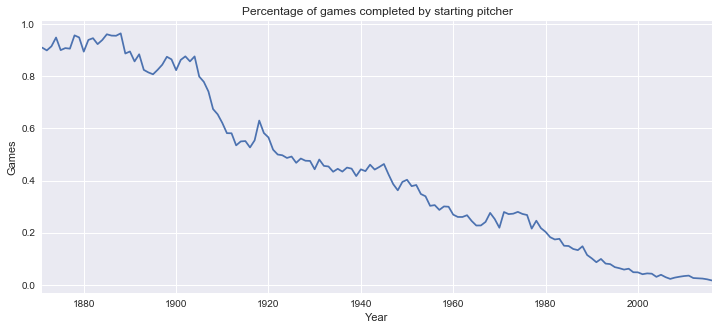

In [24]:
ax = pitching_year_totals['Percentage'].plot(grid=True,figsize=(12,5))
ax.set(title='Percentage of games completed by starting pitcher',xlabel='Year', ylabel='Games');

In the beginning, it was common that a pitcher would pitch a whole game. But, since 1900 there's been a steady decline in the percentage of completed games. Pitchers are now being subbed off more often.

What is the reason for this? One possibility is that it's related to the number of games that are played. So, let's look at the average number of games a team has to play in a season.

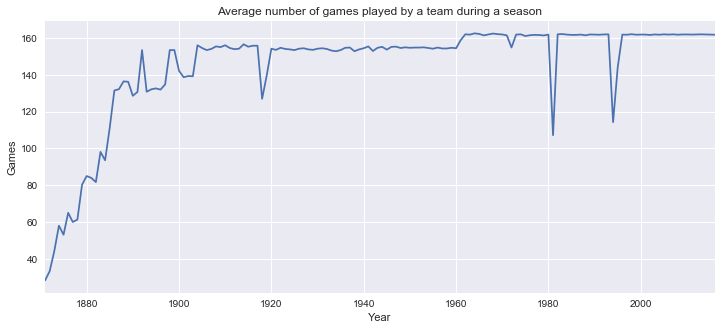

In [25]:
avg_games_per_team = teams.loc[:,('yearID','G')].groupby(teams['yearID']).mean()
ax = avg_games_per_team.plot('yearID','G',figsize=(12,5),legend=False)
ax.set(title='Average number of games played by a team during a season',xlabel='Year', ylabel='Games');

In this plot there are three main periods. From the beginning of the data logging, towards the beginning of the 20th century, the number of games was steadily rising. Then, between 1900 and 1960, the average number of game was around 154. And from then on, it became 162 games per season.

Once the number of games settled on more that 150 per season, the number of completed games began to decrease, and have been decreasing to this day.

Finally, looking at the number of innings a pitcher is involved in during a season, we can see some interesting things:

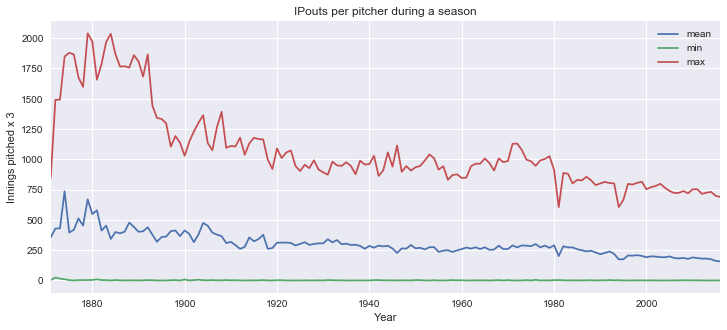

In [26]:
ax = pitching_IPO.loc[:,('mean','min','max')].plot(figsize=(12,5),legend=True)
ax.set(title='IPouts per pitcher during a season',xlabel='Year', ylabel='Innings pitched x 3');

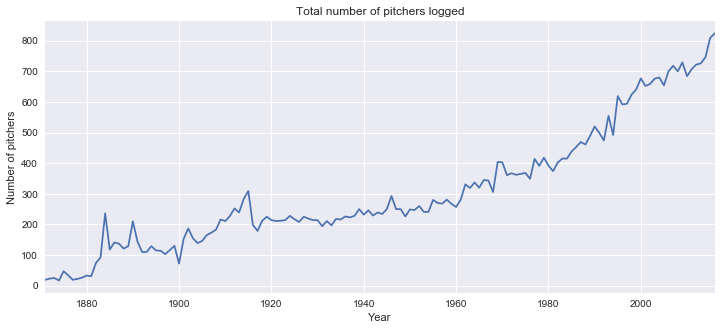

In [27]:
ax = pitching_IPO.loc[:,('count')].plot(figsize=(12,5),legend=False)
ax.set(title='Total number of pitchers logged',xlabel='Year', ylabel='Number of pitchers');

The number of innings pitched has declined over time, but the total number of games a team plays has remained pretty much constant. The explanation from this is simple, and is pointed out by the count plot. There are simply more pitchers playing during a season, and so teams rotate more liberally.

Finally, lets take a look at how many games a pitcher is involved in on average.

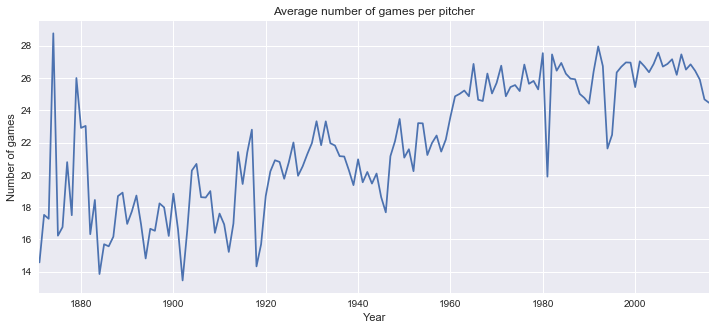

In [28]:
ax = pitching_G.loc[:,('mean')].plot(figsize=(12,5),legend=False)
ax.set(title='Average number of games per pitcher',xlabel='Year', ylabel='Number of games');

This plot shows another consequence of having more pitchers available, managers can switch them frequently and so, while they pitch less innings on average, they are involved in more games. This answers my question, they are pitching less, and rotating much more. This, in turn, influences the completed games, which is why it’s rare that a pitcher plays a whole game in the present.

### Question 2: Do World Series winner spend more?

This question is self-explanatory, how much do WS winners spend compared to the rest of the teams? Often, the most expensive teams have better players, so it is expected that the champions spend a lot. However, this doesn’t mean that teams that don’t spend lots can’t win. Look at the following graph.

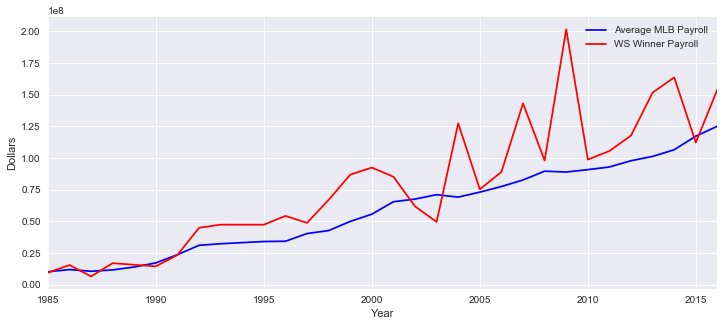

In [29]:
fig, ax = plt.subplots(figsize=(12,5))
ax = winners.plot('yearID', 'avg_salary', color='blue', grid=True, label='Average MLB Payroll', ax=ax)
ax = winners.plot('yearID', 'winner_salary', color='red', grid=True, label='WS Winner Payroll', ax=ax)
ax.set(xlabel="Year", ylabel= "Dollars")
plt.show()

That spike in 2009 is when the Yankees won, really puts into perspective how much they spend. Most years since 1985 feature a champion that spends more than the league average, few teams with smaller payrolls have won. Let's find out who they are.

In [30]:
winners[winners['winner_salary'] < winners['avg_salary']]

,yearID,comp_stage,teamID,avg_salary,winner_salary
127,1985,WS,KCA,1.007557e+07,9321179.0
133,1987,WS,MIN,1.048367e+07,6397500.0
142,1990,WS,CIN,1.707235e+07,14370000.0
145,1991,WS,MIN,2.357879e+07,23361833.0
207,2002,WS,ANA,6.746925e+07,61721667.0
214,2003,WS,FLO,7.094207e+07,49450000.0
306,2015,WS,KCA,1.171381e+08,112107025.0


Kansas City Royals have won twice while spending less that the average. In total there's been just 7 cases since 1985. Overall, World Series winners tend to spend more, but that doesn't mean they always do.

Now I want to look at salary distribution and in order to do that I must call my salaries total table and modify it a bit (as it is hierarchical):

In [31]:
salary_unstacked = salaries_total_year_team.swaplevel(0, 1).to_frame().reset_index()
salary_unstacked.head()

,teamID,yearID,salary
0,ATL,1985,14807000
1,BAL,1985,11560712
2,BOS,1985,10897560
3,CAL,1985,14427894
4,CHA,1985,9846178


Ok, now that it's become a dataframe, I'll use Seaborn's boxplot in order to visualize the distribution over each year. This is a pretty large plot, so I use the years in the Y axis:

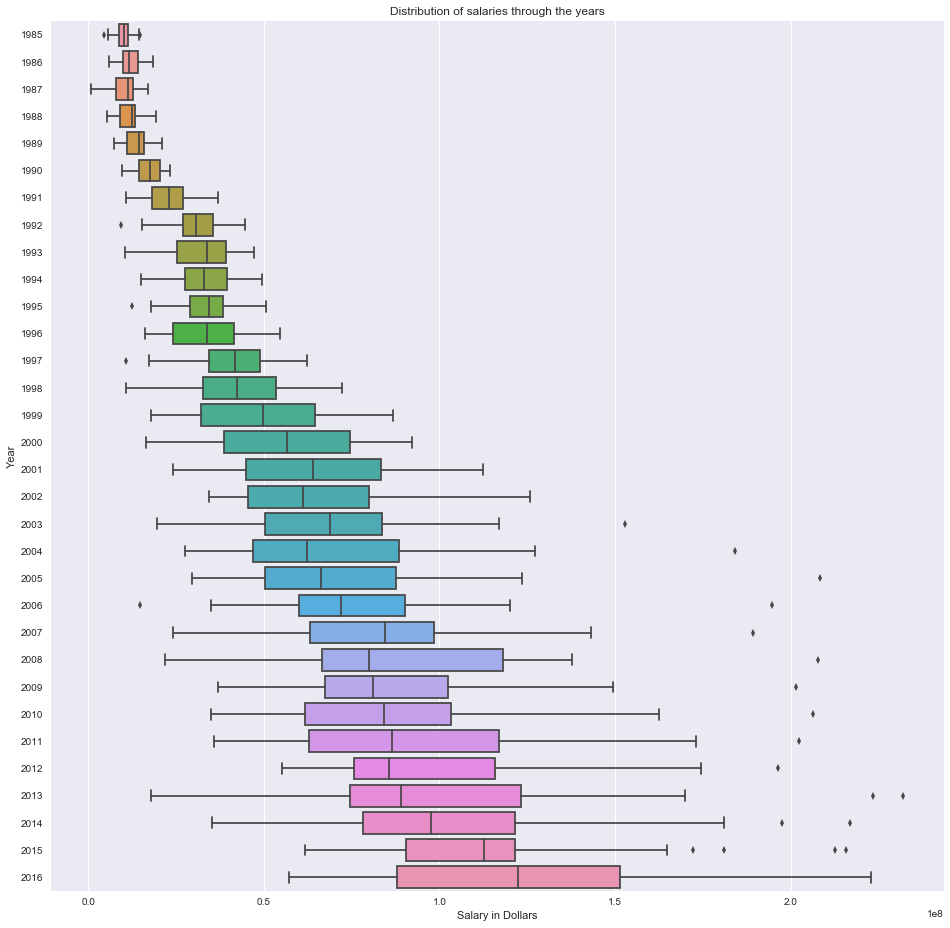

In [32]:
fig, ax = plt.subplots(figsize=(16,16))
ax = sns.boxplot(x = 'salary', y = 'yearID', data = salary_unstacked, orient = 'h')
ax.set(title='Distribution of salaries through the years',xlabel='Salary in Dollars', ylabel='Year');

Now, this boxplot is very interesting: The increasing median follows the average we saw in the previous plot. Also, notice how outliers begin showing up in the decade of the 2000's. From 2003 to 2015 the outliers are very pronounced there's at least one team spending 1.5 times what the upper quartile is. Then, in 2016 they dissappear, which points that the top 25% spending teams are much more closer than before. There's a lot of money in baseball.

### Question 3: How do offense and defense relate to a team's performance?

Since there's a lot of data on this, I specifically chose the 2015 season to reduce the numbers of data points I was working with. 

I think a team’s offense and defense are represented with how much they score and how much they let the opposition score. So, I picked the data for Runs, Runs Against, ERA, Errors and Hits for this season, and then grouped it by rank (the position the team finished the season in). This gives me a summary on how do the better teams perform. I also check for missing values. 

In [33]:
teams_2015 = teams.loc[:,('yearID','teamID','name','Rank','R','RA','ERA','E','H')][teams.yearID == 2015]
teams_2015.isnull().sum() 

yearID    0
teamID    0
name      0
Rank      0
R         0
RA        0
ERA       0
E         0
H         0
dtype: int64

Data is complete, so now let's do some calculations:

In [34]:
teams_2015.loc[:,('R','RA','ERA','E','H')].groupby(teams['Rank']).mean()

,R,RA,ERA,E,H
Rank,,,,,
1,727.166667,629.500000,3.596667,92.333333,1413.166667
2,714.166667,645.666667,3.703333,92.333333,1403.333333
3,677.500000,667.833333,3.846667,87.166667,1391.833333
4,633.333333,716.166667,4.110000,98.000000,1367.666667
5,689.000000,782.000000,4.525000,101.833333,1441.666667


It's clear that the best performing teams score more than they concede, and they also have fewer errors, and thus, a lower ERA. Looking at the average number of hits produced, however, is quite surprising. The teams in 5th place produced more hits on average this season than the rest of the teams.

Let's look at the runs scored and conceded by each team in a scatter plot, to get a distinct perspective.

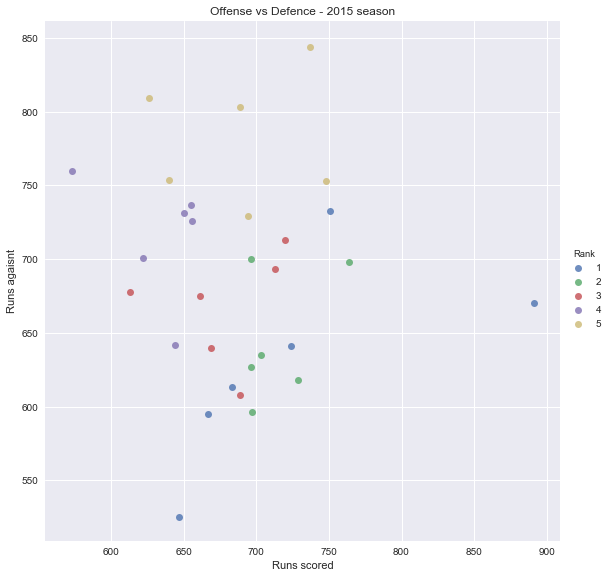

In [35]:
ax = sns.lmplot( 'R', 'RA', data=teams_2015, hue = 'Rank', fit_reg=False, size=8)
ax.set(title='Offense vs Defence - 2015 season',xlabel='Runs scored', ylabel='Runs agaisnt');

This plot has an interesting tendency in that the better teams are in the lower-right, while the worse ones are in the top-left. It feels as there are diagonal lines dividing it in sections.

Teams that score more than they concede tend to top their divisions, this is pretty much given. Yet it's interesing how some teams score a lot, and other dont. Just look at the outliers. Let's find out who they are:

In [36]:
teams_2015[teams_2015.R > 800]

,yearID,teamID,name,Rank,R,RA,ERA,E,H
2803,2015,TOR,Toronto Blue Jays,1,891,670,3.8,88,1480


In [37]:
teams_2015[teams_2015.RA < 550]

,yearID,teamID,name,Rank,R,RA,ERA,E,H
2800,2015,SLN,St. Louis Cardinals,1,647,525,2.94,96,1386


These two teams finished first, yet their numbers are pretty different. The Blue Jays scored 244 more runs and conceded 145 fewer than the Cardinals. Baseball is not a simple "score more, win more" game, there must be a nice balance between offense and defense. 

In hindsight, as there are no draws it's obvious that the best teams of the season score more than they concede, positive differences keep adding with each victory. The conclusion is quite very simple, it doesn't matter how much you score or concede, as long as you're winning games.

### A little extra

Here's a scatter plot for RA vs. R for all logged seasons. Of course, the first seasons had fewer games, so they had fewer runs scored in general. Since the 1900's the number of games has been quite consistent, so that's why most data points are between 500 and 900 runs. Having all these makes for a pretty fun looking plot, wouldn't you agree?

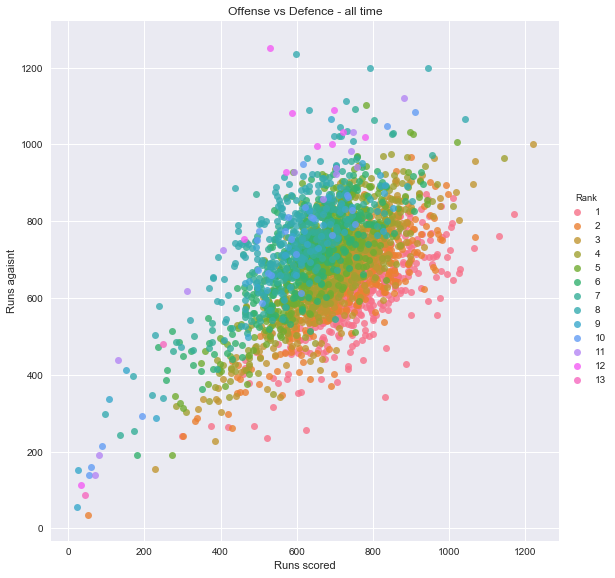

In [38]:
ax = sns.lmplot( 'R', 'RA', data=teams, hue = 'Rank', fit_reg=False, size=8)
ax.set(title='Offense vs Defence - all time',xlabel='Runs scored', ylabel='Runs agaisnt');

Historically, winning teams have of course scored more than they have conceded. Those who ended #1 in their regular season are located in the lower-right portion of the plot, while the worse performers are in the top-left.

<a id='conclusions'></a>
## Conclusions

To conclude, I’ll summarize my findings from this exploration. First off, pitchers play in more games today, but pitch less innings on average. In the past, it was common for pitchers to pitch complete games, but now it’s a rarity. This heavy rotation of pitchers is enabled by the increase their numbers – teams can effectively switch them out to prevent injuries or burnout. Having access to injury data and other kind of medical records would be fantastic to further investigate the changes in pitching.

Regarding spending, it’s evident that the wages a team pays to it’s players has constantly increased through the years. World Series champions often spend more than the average of the MLB. Yet, there’s been some instances where the champions spend less that the average. This result is important because it means that bigger spending doesn’t guarantee trophies.

Finally, my offense vs defense exploration didn’t reveal much. Like I mentioned before, there are no draws so teams who win more tend to have a bigger run difference. However, it is important to note how some of the division first places didn’t outscore some of the worse placers. The same goes for defense, some winners had a worse defensive record that 2nd or 3rd places. Teams that score more, or have better defenses tend to place better, but that is it. A more throughout investigation is required if we expect to find a clearer relationship, one that includes a lot more variables.

Overall, exploring this dataset managed to answer my rather simple questions and made me more curious as to how performance stats and results are related in Baseball. Perhaps in the future, once I complete this nanodegree, I’ll revisit it and find new stuff.
